In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data/bank-additional-full.csv",delimiter=';')

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
X = df.iloc[:,:-1]
y = df['y']

In [85]:
X['housing_unknown'].corr(X['loan_unknown'])

0.9999999999999998

In [83]:
X = pd.get_dummies(data=X, drop_first=True)
y = pd.get_dummies(data=y, drop_first=True)
X.T.head(53)

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56.000,57.000,37.000,40.000,56.000,45.000,59.000,41.000,24.000,25.000,...,62.000,64.000,36.000,37.000,29.000,73.000,46.000,56.000,44.000,74.000
duration,261.000,149.000,226.000,151.000,307.000,198.000,139.000,217.000,380.000,50.000,...,483.000,151.000,254.000,281.000,112.000,334.000,383.000,189.000,442.000,239.000
campaign,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,2.000,3.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,3.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,...,6.000,999.000,999.000,999.000,9.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,...,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,...,94.767,94.767,94.767,94.767,94.767,94.767,94.767,94.767,94.767,94.767
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,...,-50.800,-50.800,-50.800,-50.800,-50.800,-50.800,-50.800,-50.800,-50.800,-50.800
euribor3m,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,...,1.031,1.028,1.028,1.028,1.028,1.028,1.028,1.028,1.028,1.028
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,...,4963.600,4963.600,4963.600,4963.600,4963.600,4963.600,4963.600,4963.600,4963.600,4963.600


In [81]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [20]:
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,-0.067523,0.030045,0.053008,0.040889,0.019027,-0.021356,0.019137,-0.023671,-0.016376,0.035626
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,0.008054,-0.015941,0.015454,0.018011,-0.023068,0.014666,0.004140,0.014537,-0.011665,0.044876
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,-0.032704,-0.079028,-0.049126,-0.033953,0.014405,0.005141,-0.025125,-0.021088,0.087645,-0.050893
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.070690,-0.016946,-0.128677,-0.154629,0.001031,-0.008186,-0.007300,0.001021,0.491353,-0.950700
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.012534,0.081050,0.127754,0.157651,-0.002012,0.001512,0.000090,-0.003929,-0.878776,0.524045
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,...,-0.111356,-0.105917,-0.213706,-0.170366,-0.018139,-0.007673,0.014582,0.026797,0.472501,-0.256886
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,...,-0.057274,-0.215273,-0.092174,-0.046905,0.001273,-0.017143,0.001216,0.012479,0.304264,-0.077416
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,...,-0.011740,-0.052892,0.170425,0.169175,-0.041382,-0.027877,0.050033,0.023711,0.099724,0.084824
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,...,-0.133859,0.019524,-0.185937,-0.190321,-0.023279,-0.013757,0.022732,0.030201,0.488406,-0.281022
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,...,-0.171782,0.027593,-0.273236,-0.292156,-0.017433,-0.002658,0.009923,0.023272,0.493051,-0.350613


pdays             poutcome_success    0.950700
emp.var.rate      euribor3m           0.972245
euribor3m         emp.var.rate        0.972245
poutcome_success  pdays               0.950700
dtype: float64


<AxesSubplot:>

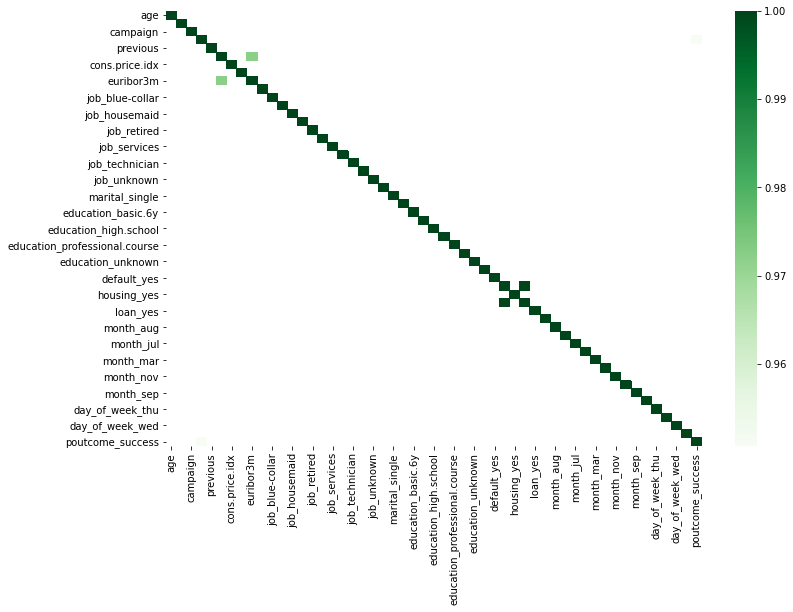

In [77]:
corr = X.corr()
c1 = corr.abs().unstack()
c_abs = corr.abs()
c_plot = c_abs[c_abs > .95]
a = c1[c1 > 0.95]
a = a[a != 1.0]
print(a)
plt.figure(figsize=(12,8))
sns.heatmap(c_plot, cmap="Greens")

In [79]:
X['euribor3m'].head(10)

0    4.857
1    4.857
2    4.857
3    4.857
4    4.857
5    4.857
6    4.857
7    4.857
8    4.857
9    4.857
Name: euribor3m, dtype: float64

In [80]:
X['loan_unknown'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: loan_unknown, dtype: uint8

['euribor3m', 'loan_unknown']


<AxesSubplot:>

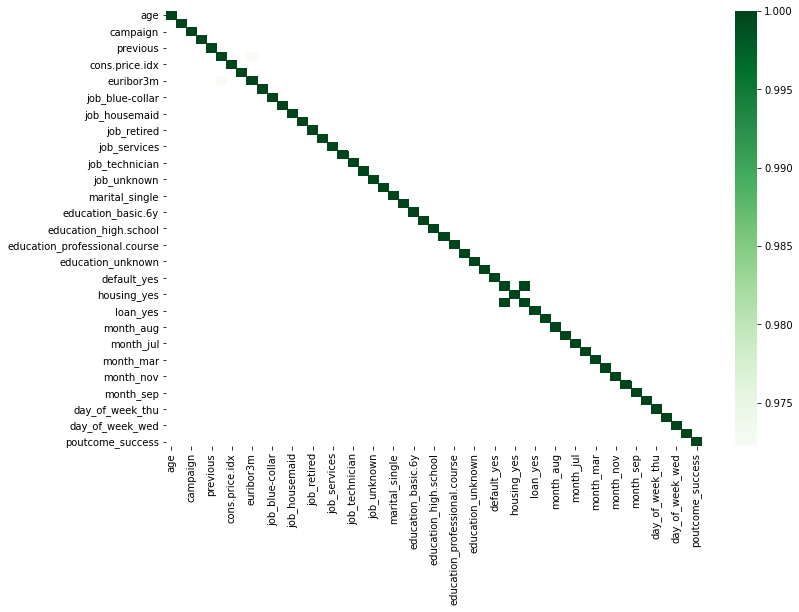

In [72]:
corr = X.corr()

kot = corr[corr>=.95]

upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [26]:
kot[2]

KeyError: 2

In [7]:
y.to_numpy().ravel().shape

(41188,)

In [77]:
# Scaling and normalizing the data
ss = preprocessing.StandardScaler()
X_normalized = ss.fit_transform(X)

In [78]:
df_X_mms = pd.DataFrame(X_normalized, columns = X.columns)
df_X_mms.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
5,0.477486,-0.232513,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
6,1.820911,-0.460069,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
7,0.093650,-0.159232,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
8,-1.537652,0.469442,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
9,-1.441693,-0.803333,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857


In [79]:
c_space = np.logspace(-4, 4, 20)
c_space

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best C : 0.9349918110371148


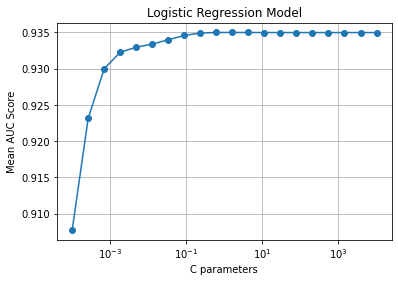

In [119]:
c_space = np.logspace(-4, 4, 20)
param_grid={'C' : c_space}

auc_scores = []

for c in c_space:
    log_reg_model = LogisticRegression(C=c)
    log_reg_cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
    score = cross_validate(log_reg_model, X_normalized, y, scoring='roc_auc', cv=log_reg_cv, n_jobs=-1)
    auc_scores.append(np.mean(score['test_score']))


idx = np.argmax(auc_scores)
print(f"Best C : {auc_scores[idx]}")
fig, ax = plt.subplots()
ax.plot(c_space,auc_scores,marker = 'o')
ax.set_xscale('log')
# Set plot title and axes labels
ax.set(title = "Logistic Regression Model",
       xlabel = "C parameters",
       ylabel = "Mean AUC Score")
plt.grid()
plt.show()

In [17]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 150, 250],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3],
    'n_estimators': [10, 50, 100, 250, 500, 1000]
}
# Create a based model
rf_model = RandomForestClassifier()
# evaluate the model
rfr_cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring='roc_auc',
                          cv = rfr_cv, n_jobs = 10, verbose = 2, refit=callable)
# Fit the grid search to the data for y1
print("Grid result for X normalized and Y1")
grid_results = grid_search.fit(X_normalized, y.to_numpy().ravel())
print(grid_results.best_params_)

Grid result for X normalized and Y1
Fitting 9 folds for each of 108 candidates, totalling 972 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    9.1s
/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed: 11.5min


KeyboardInterrupt: 

In [19]:
sc = preprocessing.StandardScaler()
X_std_scaled = sc.fit_transform(X)

In [21]:
df_X_sc = pd.DataFrame(X_std_scaled, columns = X.columns)
df_X_sc.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
5,0.477486,-0.232513,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
6,1.820911,-0.460069,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
7,0.093650,-0.159232,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
8,-1.537652,0.469442,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
9,-1.441693,-0.803333,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857


In [122]:
parameter_space = {
    'hidden_layer_sizes': [(10,10,10), (10,10,10,10), (10,10,10,10,10), (10,10,10,10,10,10)],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
}
mlp_model = MLPClassifier()
mlp_cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = mlp_model, param_grid = parameter_space, scoring='roc_auc',
                          cv = mlp_cv, n_jobs = -1, verbose = 2, refit=callable)
grid_results = grid_search.fit(X_std_scaled, y.to_numpy().ravel())
print(grid_results.best_params_)
print(f"Auc mean score : {np.mean(grid_search['test_score'])}")

Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 22.1min finished


{'alpha': 1e-05, 'hidden_layer_sizes': (10, 10, 10)}


TypeError: 'GridSearchCV' object is not subscriptable

In [124]:
nn_model = MLPClassifier(**grid_results.best_params_)
five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
y_pred_nn = cross_val_predict(nn_model, X_std_scaled, y.to_numpy().ravel(), cv=five_fold_cv)
print(classification_report(y, y_pred_nn))

/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     36548
           1       0.61      0.55      0.58      4640

    accuracy                           0.91     41188
   macro avg       0.78      0.75      0.76     41188
weighted avg       0.91      0.91      0.91     41188



/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [98]:
y['yes'].unique()

array([0, 1], dtype=uint8)

In [102]:
y_np = y.to_numpy().ravel()

In [110]:
X_std_scaled.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [112]:
log_reg_model = LogisticRegression(C=1,max_iter=1000)
five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
y_pred = cross_val_predict(log_reg_model, X_std_scaled, y_np, cv=five_fold_cv)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36548
           1       0.67      0.42      0.52      4640

    accuracy                           0.91     41188
   macro avg       0.80      0.70      0.73     41188
weighted avg       0.90      0.91      0.90     41188



In [104]:
def class_report(model):
    mlp_model_tuned = MLPRegressor(**grid_results.best_params_)
    five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
    for train_index, test_index in five_fold_cv.split(merged):
        X_train, X_test = X_std_scaled[train_index], X_std_scaled[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
        model.fit(X_train, y_train) #Training the model
        target_names = ['0.0', '1.0']
        print(classification_report(y_test, model.predict(X_test),target_names=target_names))
              
log_reg_model = LogisticRegression(C=1)
class_report(log_reg_model)

TypeError: cannot perform reduce with flexible type

In [ ]:
make_scorer(classification_report_with_accuracy_score)

In [51]:
score_result

array([0.92891505, 0.93866482, 0.93470792, 0.92667313, 0.93173245])

In [ ]:
five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [68]:
merged = pd.concat([df_X_sc, y], axis=1, join='inner')
merged.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0


In [118]:
scrrss = np.array([10,20,30,40,50])
idx = np.argmax(scrrss)
scrrss[idx]

50

In [4]:
from tabulate import tabulate

import pandas as pd

data = {"product_name":["Keyboard","Mouse", "Monitor", "CPU","CPU", "Speakers",pd.NaT],
        "Unit_Price":[500,200, 5000.235, 10000.550, 10000.550, 250.50,None],
        "No_Of_Units":[5,5, 10, 20, 20, 8,pd.NaT],
        "Available_Quantity":[5,6,10,"Not Available","Not Available", pd.NaT,pd.NaT],
        "Available_Since_Date":['11/5/2021', '4/23/2021', '08/21/2021','09/18/2021','09/18/2021','01/05/2021',pd.NaT]
       }

df = pd.DataFrame(data)

df = df.astype({"Unit_Price": float})


df

,product_name,Unit_Price,No_Of_Units,Available_Quantity,Available_Since_Date
0,Keyboard,500.000,5,5,11/5/2021
1,Mouse,200.000,5,6,4/23/2021
2,Monitor,5000.235,10,10,08/21/2021
3,CPU,10000.550,20,Not Available,09/18/2021
4,CPU,10000.550,20,Not Available,09/18/2021
5,Speakers,250.500,8,NaT,01/05/2021
6,NaT,NaN,NaT,NaT,NaT


In [3]:
!pip install tabulate

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(df)

,product_name,Unit_Price,No_Of_Units,Available_Quantity,Available_Since_Date
0,Keyboard,500.000,5,5,11/5/2021
1,Mouse,200.000,5,6,4/23/2021
2,Monitor,5000.235,10,10,08/21/2021
3,CPU,10000.550,20,Not Available,09/18/2021
4,CPU,10000.550,20,Not Available,09/18/2021
5,Speakers,250.500,8,NaT,01/05/2021
6,NaT,NaN,NaT,NaT,NaT


In [6]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════╤══════════════╤═══════════════╤══════════════════════╤════════════════════════╕
│    │ product_name   │   Unit_Price │ No_Of_Units   │ Available_Quantity   │ Available_Since_Date   │
╞════╪════════════════╪══════════════╪═══════════════╪══════════════════════╪════════════════════════╡
│  0 │ Keyboard       │       500    │ 5             │ 5                    │ 11/5/2021              │
├────┼────────────────┼──────────────┼───────────────┼──────────────────────┼────────────────────────┤
│  1 │ Mouse          │       200    │ 5             │ 6                    │ 4/23/2021              │
├────┼────────────────┼──────────────┼───────────────┼──────────────────────┼────────────────────────┤
│  2 │ Monitor        │      5000.23 │ 10            │ 10                   │ 08/21/2021             │
├────┼────────────────┼──────────────┼───────────────┼──────────────────────┼────────────────────────┤
│  3 │ CPU            │     10000.5  │ 20            │ Not Available     